In [13]:
# import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from __future__ import print_function

# Loading required packages
import spacy
import pandas as pd
import re
# import gensim
# import gensim.downloader
# from gensim.models import Word2Vec
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
# from gensim.models.phrases import Phrases, Phraser
import nltk
from numpy import mean
from numpy import std
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from statistics import mean
import json
import csv
import ast
import numpy as np

# from flair.embeddings import WordEmbeddings
# from flair.data import Sentence
# from flair.embeddings import TransformerWordEmbeddings

from tqdm import tqdm
import pickle 
# Set seed
seed = np.random.seed(1)


# Select Spacy model
# Efficiency
nlp = spacy.load("en_core_web_sm")

# Accuracy
# nlp = spacy.load("en_core_web_trf")

# Change working directory
# %cd '/Users/richardfrissen/Documents/Maastricht University/Thesis/Development/Datasets'

In [14]:
class_names=['Demographic and Racial language', 'Exclusive language', 'Feminine-coded words', 'LGBTQ-coloured language', 'Masculine-coded words', 'O']

In [15]:
%%time

# Optionally the data can be saved to create a checkpoint

# data.to_csv('data_features_full_wordembedding_glove.csv', index = False)

data = pd.read_csv('data_features_full_wordembedding_bert.csv', nrows = 1000, na_values=['nan'])

data.head(10)

CPU times: user 185 ms, sys: 23.8 ms, total: 209 ms
Wall time: 271 ms


,Token,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,...,758,759,760,761,762,763,764,765,766,767
0,food,O,92,0,True,True,False,True,False,False,...,0.078347,-0.213393,-0.360482,0.599680,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
1,a,O,90,0,True,True,False,True,False,False,...,0.005257,0.682079,-0.566330,0.124105,0.314677,-0.002286,0.631670,0.115115,1.044015,0.560535
2,fast,O,86,0,True,True,False,True,False,False,...,0.577659,0.032252,-0.028243,0.251337,-1.222422,1.028620,0.959377,-0.790838,0.316029,0.436458
3,grow,O,100,0,True,True,False,True,False,False,...,-0.717857,-0.141034,-0.484016,0.332784,0.141271,0.088913,-0.936067,-0.500807,0.084751,0.278871
4,-winne,O,97,0,False,True,False,True,False,False,...,0.076417,0.086553,-0.706749,0.188063,0.195960,0.284505,0.606089,0.832055,0.249324,0.395537
5,online,O,86,0,True,True,False,True,False,False,...,0.015824,-0.081609,-0.880314,0.047720,-0.266453,0.458979,0.197704,-0.666143,0.375859,0.119397
6,food,O,92,0,True,True,False,True,False,False,...,0.078347,-0.213393,-0.360482,0.599680,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
7,community,O,92,0,True,True,False,True,False,False,...,-0.400877,0.182614,-1.512862,0.898749,-1.064716,-0.387649,-0.566761,-0.220441,-0.061128,-0.138970
8,and,O,89,0,True,True,False,True,False,False,...,0.209402,0.291369,-0.166621,0.138620,0.343412,0.192610,0.490048,-0.279343,0.030398,0.067056
9,crowd,O,92,0,True,True,False,True,False,False,...,0.374465,0.081873,-0.957627,-0.046060,-0.142485,0.079933,0.037512,-0.538567,-0.155005,0.147617


In [16]:
data["Label"] = data["Label"].astype('category').cat.codes

In [17]:
%%time

# Replace NaN values with a "0"

data = data.replace(np.nan, '0', regex=True)

# We drop the token, as it is no longer needed for prediction
data.drop('Token', axis=1, inplace=True)
data.head(10)

# data = data.stack().str.decode('utf-8').unstack()

CPU times: user 337 ms, sys: 16.3 ms, total: 353 ms
Wall time: 354 ms


,Label,pos,ent_type,is_alpha,is_ascii,is_digit,is_lower,is_upper,is_title,is_punct,...,758,759,760,761,762,763,764,765,766,767
0,2,92,0,True,True,False,True,False,False,False,...,0.078347,-0.213393,-0.360482,0.59968,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
1,2,90,0,True,True,False,True,False,False,False,...,0.005257,0.682079,-0.56633,0.124105,0.314677,-0.002286,0.63167,0.115115,1.044015,0.560535
2,2,86,0,True,True,False,True,False,False,False,...,0.577659,0.032252,-0.028243,0.251337,-1.222422,1.02862,0.959377,-0.790838,0.316029,0.436458
3,2,100,0,True,True,False,True,False,False,False,...,-0.717857,-0.141034,-0.484016,0.332784,0.141271,0.088913,-0.936067,-0.500807,0.084751,0.278871
4,2,97,0,False,True,False,True,False,False,False,...,0.076417,0.086553,-0.706749,0.188063,0.19596,0.284505,0.606089,0.832055,0.249324,0.395537
5,2,86,0,True,True,False,True,False,False,False,...,0.015824,-0.081609,-0.880314,0.04772,-0.266453,0.458979,0.197704,-0.666143,0.375859,0.119397
6,2,92,0,True,True,False,True,False,False,False,...,0.078347,-0.213393,-0.360482,0.59968,0.611853,0.220767,0.342419,0.055093,0.177906,0.719633
7,2,92,0,True,True,False,True,False,False,False,...,-0.400877,0.182614,-1.512862,0.898749,-1.064716,-0.387649,-0.566761,-0.220441,-0.061128,-0.13897
8,2,89,0,True,True,False,True,False,False,False,...,0.209402,0.291369,-0.166621,0.13862,0.343412,0.19261,0.490048,-0.279343,0.030398,0.067056
9,2,92,0,True,True,False,True,False,False,False,...,0.374465,0.081873,-0.957627,-0.04606,-0.142485,0.079933,0.037512,-0.538567,-0.155005,0.147617


In [18]:
%%time

# 80% / 20% split
# Train, Test = train_test_split(data1, test_size=0.2, shuffle=False)

X = data.drop(['Label'],axis=1).values # independant features
y = data['Label'].values # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

CPU times: user 36.7 ms, sys: 4.75 ms, total: 41.5 ms
Wall time: 40.6 ms


In [19]:
max_iterations = 1000000000

In [20]:
# Optionally the data can be saved to create a checkpoint - RF

import pickle

# f = open('bert_rf.pckl', 'wb')
# pickle.dump(clf, f)
# f.close()

f = open('bert_rf.pckl', 'rb')
clf = pickle.load(f)
f.close()

In [21]:
type(X)

numpy.ndarray

In [22]:
X_featurenames = (pd.DataFrame(X_train)).columns

In [23]:
len(X_featurenames)

784

In [24]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [13]:
# %time
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_train, check_additivity=False)

In [25]:
import shap

In [ ]:
# Deze gebruiken
# %time
# explainer = shap.KernelExplainer(clf.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)

Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


CPU times: user 2 µs, sys: 8 µs, total: 10 µs
Wall time: 19.6 µs


  0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 21.2 µs


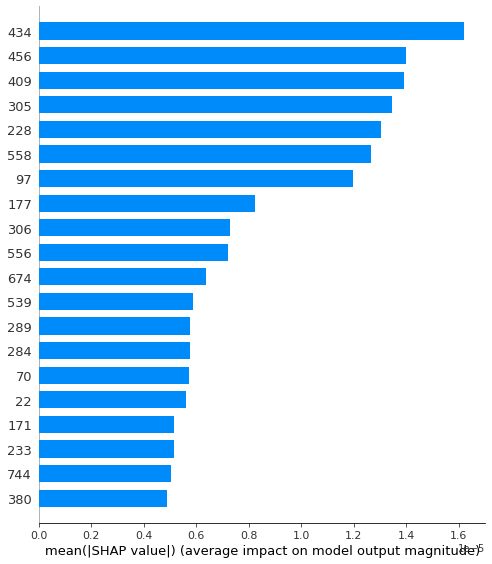

In [26]:
%time
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 23.1 µs


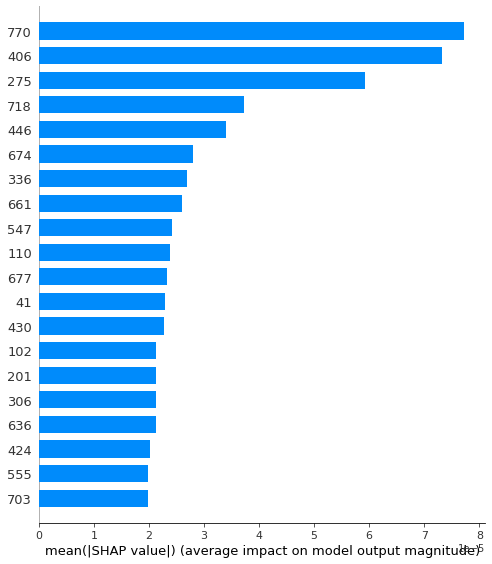

In [27]:
%time
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

CPU times: user 3 µs, sys: 7 µs, total: 10 µs
Wall time: 21.7 µs


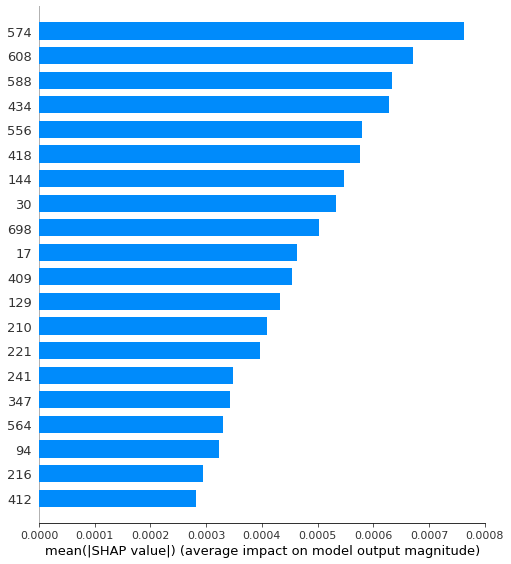

In [28]:
%time
shap.summary_plot(shap_values[2], X_train, plot_type="bar")

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 21.2 µs


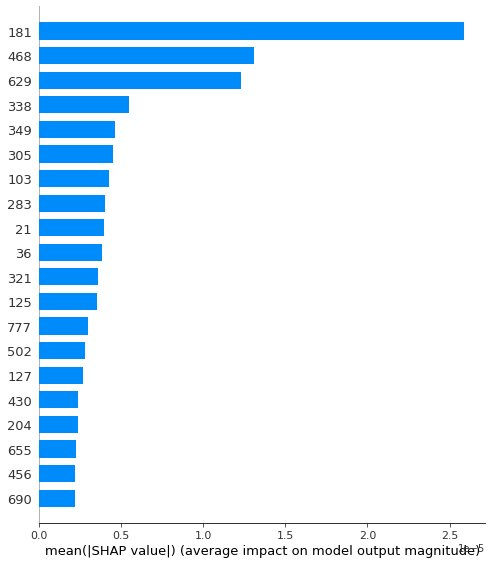

In [29]:
%time
shap.summary_plot(shap_values[3], X_train, plot_type="bar")

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 20.7 µs


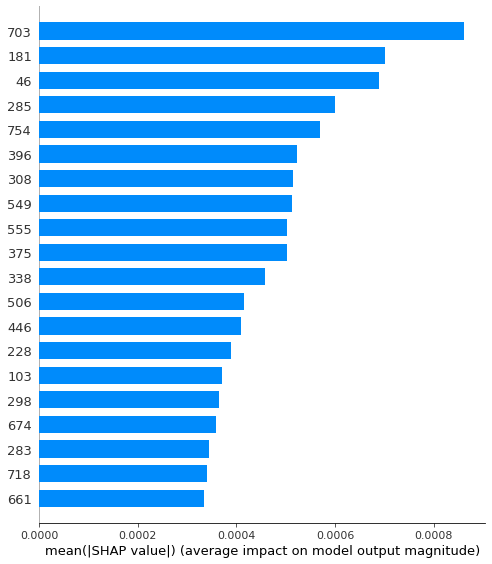

In [30]:
%time
shap.summary_plot(shap_values[4], X_train, plot_type="bar")

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 20.5 µs


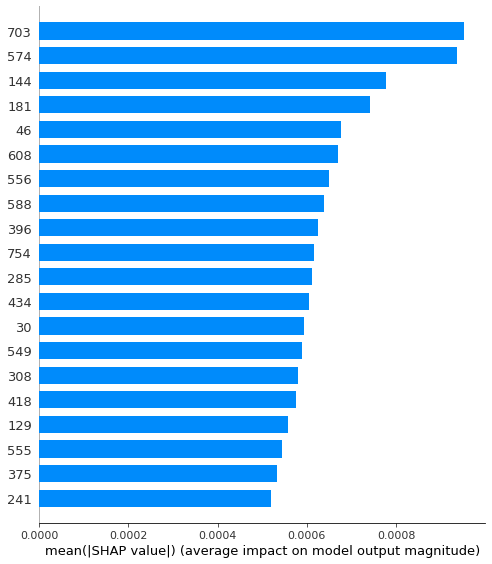

In [31]:
%time
shap.summary_plot(shap_values[5], X_train, plot_type="bar")

CPU times: user 4 µs, sys: 8 µs, total: 12 µs
Wall time: 23.1 µs


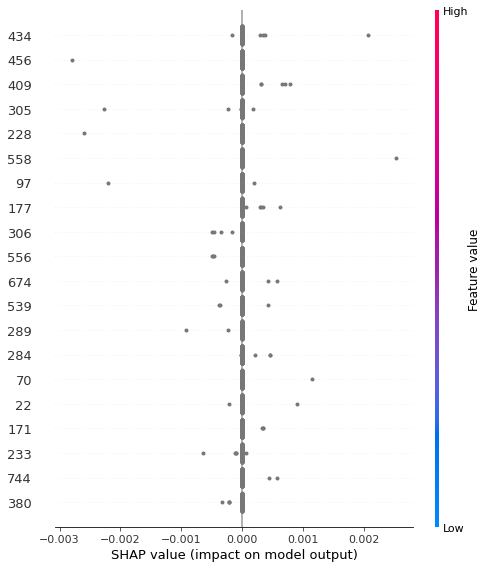

In [32]:
%time
shap.summary_plot(shap_values[0], X_train, feature_names = X_train.columns)

CPU times: user 0 ns, sys: 13 µs, total: 13 µs
Wall time: 22.9 µs


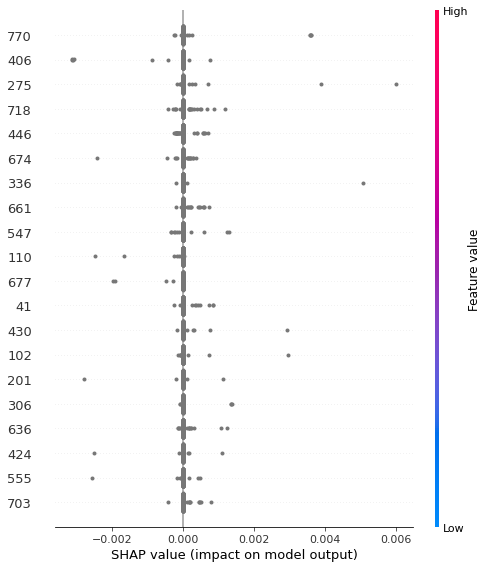

In [33]:
%time
shap.summary_plot(shap_values[1], X_train, feature_names = X_train.columns)

CPU times: user 3 µs, sys: 7 µs, total: 10 µs
Wall time: 22.2 µs


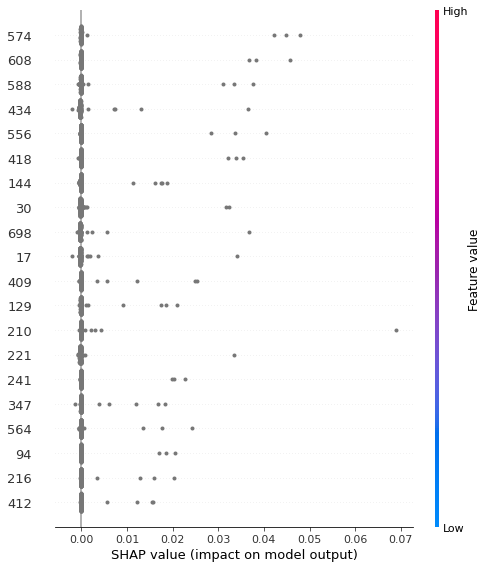

In [34]:
%time
shap.summary_plot(shap_values[2], X_train, feature_names = X_train.columns)

CPU times: user 4 µs, sys: 7 µs, total: 11 µs
Wall time: 22.9 µs


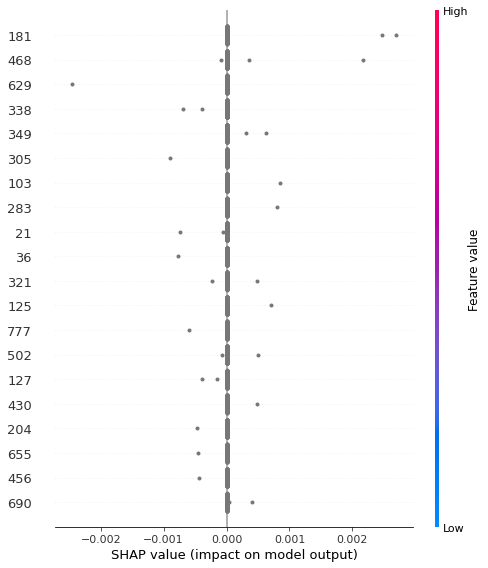

In [35]:
%time
shap.summary_plot(shap_values[3], X_train, feature_names = X_train.columns)

CPU times: user 4 µs, sys: 8 µs, total: 12 µs
Wall time: 23.4 µs


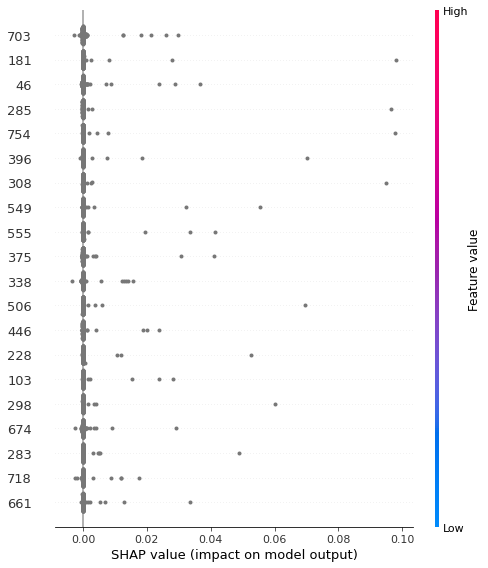

In [36]:
%time
shap.summary_plot(shap_values[4], X_train, feature_names = X_train.columns)

CPU times: user 3 µs, sys: 7 µs, total: 10 µs
Wall time: 22.9 µs


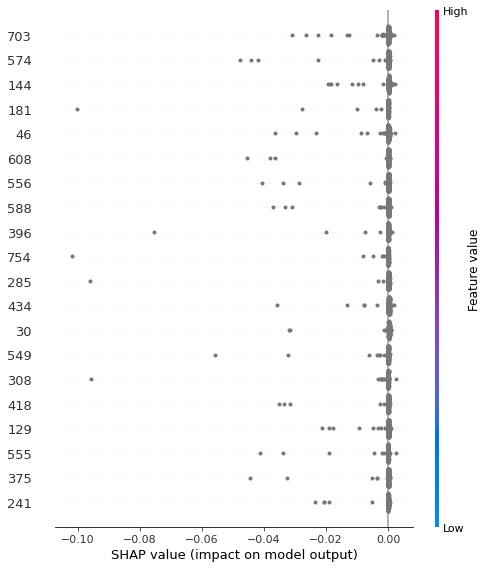

In [37]:
%time
shap.summary_plot(shap_values[5], X_train, feature_names = X_train.columns)

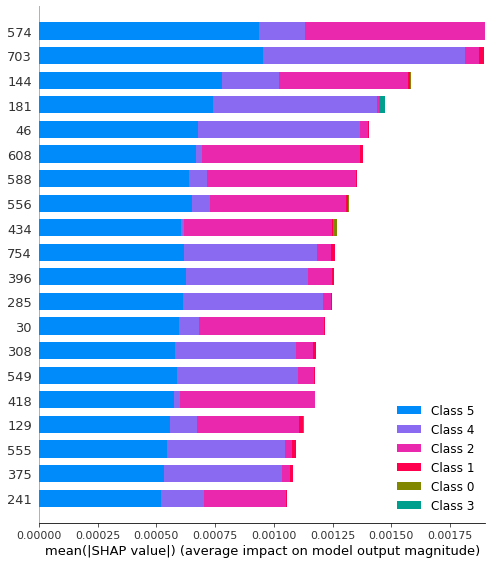

In [38]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [2]:
# Optionally the data can be saved to create a checkpoint - Shap RF

import pickle

# f = open('shap_values_flair_svm.pckl', 'wb')
# pickle.dump(shap_values, f)
# f.close()

f = open('shap_values_word2vec_svm.pckl', 'rb')
shap_values = pickle.load(f)
f.close()